<a href="https://colab.research.google.com/github/jammi-kunal/ML-assignments/blob/main/21233_final_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import string
from sklearn.preprocessing import LabelEncoder as le, OrdinalEncoder as oe, StandardScaler as ss, MinMaxScaler as mms, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import plot_tree

In [5]:
path = f'/content/drive/MyDrive/Colab Notebooks/hackathons/AnalyticsOlympiad2022Data/data/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = pd.read_csv(path+'train.csv')

In [7]:
train.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [9]:
train['ID'].duplicated().sum()

6515

In [10]:
train.columns = [x.lower() for x in list(train.columns)]

In [11]:
train['outcome'].value_counts()

0.0    60622
1.0    44378
Name: outcome, dtype: int64

In [12]:
train.isnull().sum()

id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
type_of_vehicle        0
dtype: int64

In [13]:
train.duplicated().sum()

0

#### Numerical columns:
- id
- credit_score
- vehicle_ownership
- married
- children
- postal_code
- annual_mileage
- speeding_violations
- duis
- past_accidents
- outcome

#### Categorical columns:
- age
- gender
- driving_experience
- education
- income
- vehicle_year
- type_of_vehicle

### No duplicates and Null values

In [14]:
def check_value_cnts(var):
    print('------------------------------------------------------------------------')
    print(train[var].value_counts())

In [15]:
nums = list(train.select_dtypes(include='number').columns)
cats = list(train.select_dtypes(include='object').columns)

In [16]:
list(map(check_value_cnts, cats))

------------------------------------------------------------------------
40-64    33716
65+      32962
26-39    20018
16-25    18304
Name: age, dtype: int64
------------------------------------------------------------------------
male      65317
female    39683
Name: gender, dtype: int64
------------------------------------------------------------------------
20-29y    37493
0-9y      33111
10-19y    25101
30y+       9295
Name: driving_experience, dtype: int64
------------------------------------------------------------------------
high school    46590
university     31220
none           27190
Name: education, dtype: int64
------------------------------------------------------------------------
upper class      51271
working class    24454
middle class     14738
poverty          14537
Name: income, dtype: int64
------------------------------------------------------------------------
before 2015    57511
after 2015     47489
Name: vehicle_year, dtype: int64
-----------------------------

[None, None, None, None, None, None, None]

### Feature transformation and encoding

#### Features to be Label Encoded(Nominal):
- gender
- type_of_vehicle
- vehicle_year

#### Features to be Ordinal Encoded(Ordinal):
- age
- driving_experience
- education
- income

In [17]:
y = train['outcome']
X = train.drop('outcome', axis = 1)

In [18]:
X.drop(['id', 'postal_code'], axis = 1, inplace = True)

In [19]:
nums = X.select_dtypes(include='number').columns
ohei = ['gender','type_of_vehicle', 'vehicle_year']
ordi = ['age','driving_experience','education','income']

In [20]:
agec = ['16-25','26-39','40-64','65+']
dexp = ['0-9y','10-19y','20-29y','30y+']
educ = ['none','high school','university']
inco = ['poverty','working class','middle class','upper class']

In [21]:
cat_pipeline = Pipeline(
    steps=[
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))
    ]
)

ord_pipeline = Pipeline(
    steps=[
        ("ord", oe(categories = [agec, dexp, educ, inco])),
        ("scaler", ss())
    ]
)

num_pipeline = Pipeline(
    steps=[
        ("scaler", ss())
    ]
)

In [22]:
transform = ColumnTransformer(
    transformers=[
        ("nums", num_pipeline, nums),
        ("cats", cat_pipeline, ohei),
        ("ords", ord_pipeline, ordi)
    ]
)

In [23]:
X1 = transform.fit_transform(X)

In [24]:
transform.transformers_

[('nums',
  Pipeline(steps=[('scaler', StandardScaler())]),
  Index(['credit_score', 'vehicle_ownership', 'married', 'children',
         'annual_mileage', 'speeding_violations', 'duis', 'past_accidents'],
        dtype='object')),
 ('cats',
  Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]),
  ['gender', 'type_of_vehicle', 'vehicle_year']),
 ('ords', Pipeline(steps=[('ord',
                   OrdinalEncoder(categories=[['16-25', '26-39', '40-64', '65+'],
                                              ['0-9y', '10-19y', '20-29y',
                                               '30y+'],
                                              ['none', 'high school',
                                               'university'],
                                              ['poverty', 'working class',
                                               'middle class', 'upper class']])),
                  ('scaler', StandardScaler())]), ['age',
   'driving_experience',
   'ed

In [25]:
X.duplicated().sum()

0

In [26]:
y.value_counts()/len(y)

0.0    0.577352
1.0    0.422648
Name: outcome, dtype: float64

***

In [27]:
col_names = list(nums)+['female',
                        'male',
                        'vehicle_hatchback',
                        'vehicle_suv',
                        'vehicle_sedan',
                        'vehicle_sports_car',
                        'vehicle_year_after_2015',
                        'vehicle_year_before_2015']+ordi

In [28]:
X1 = pd.DataFrame(X1, columns = col_names)

## Data Visualization

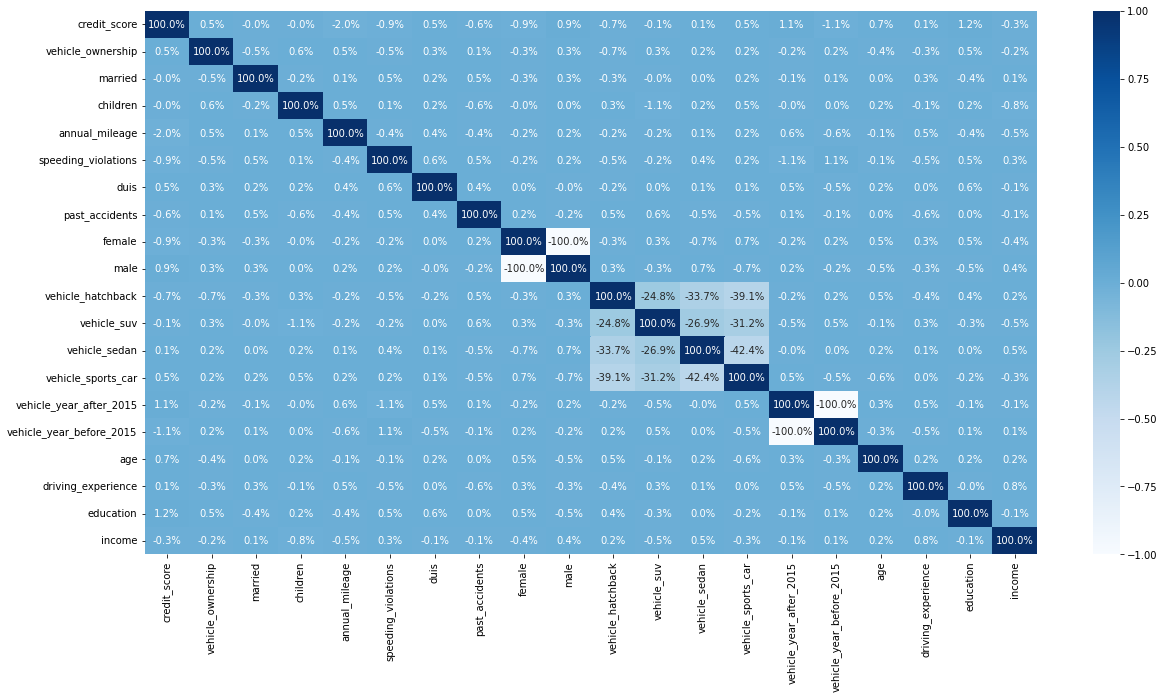

In [29]:
# heatmap
plt.figure(figsize = (20,10))
sns.heatmap(X1.corr(), cmap = 'Blues', annot = True, fmt = '.1%')
plt.show()

### Inference
- No correlation among the features

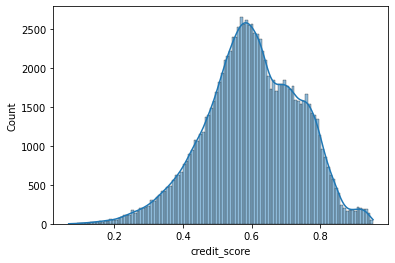

In [30]:
sns.histplot(x = X['credit_score'], kde = True)

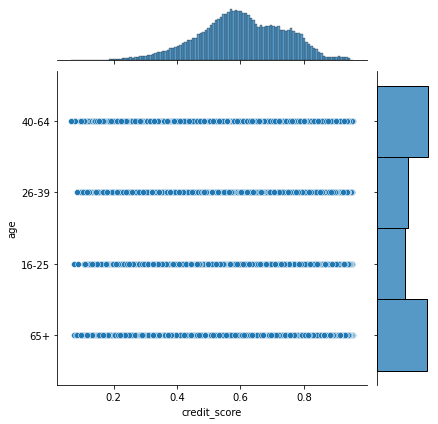

In [31]:
sns.jointplot(data = X, x = 'credit_score', y = 'age')
plt.show()

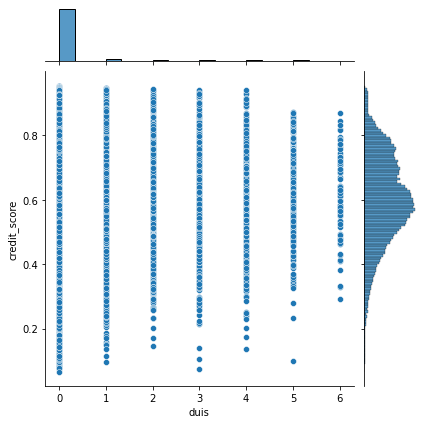

In [32]:
sns.jointplot(data = X, x= 'duis',y= 'credit_score')

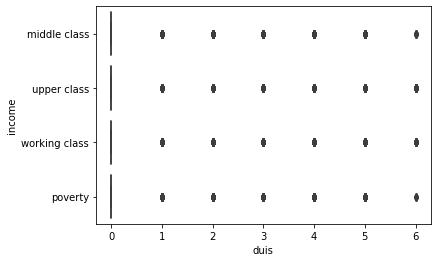

In [33]:
sns.boxplot(data= X, x = 'duis', y = 'income')

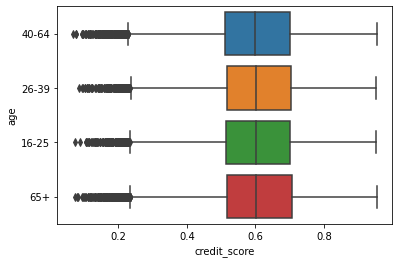

In [34]:
sns.boxplot(data = X, x = 'credit_score', y = 'age')

In [35]:
age_cs = pd.pivot_table(data= X, values = ['credit_score'], columns = 'age',aggfunc = np.sum)

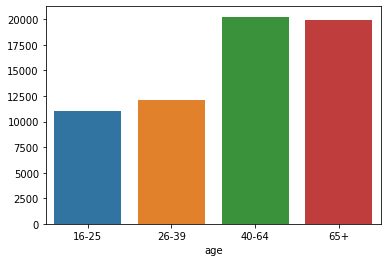

In [36]:
sns.barplot(x = age_cs.columns, y = age_cs.values[0])

In [37]:
pd.pivot_table(data= X, columns = ['married', 'education'], values = ['credit_score', 'duis'], aggfunc= np.sum)

married                0.0                                    1.0  \
education      high school         none   university  high school   
credit_score  11640.608255  6744.795855  7908.619071  16464.06021   
duis           2437.000000  1430.000000  1737.000000   3537.00000   

married                                  
education            none    university  
credit_score  9540.519563  10929.535456  
duis          2005.000000   2476.000000

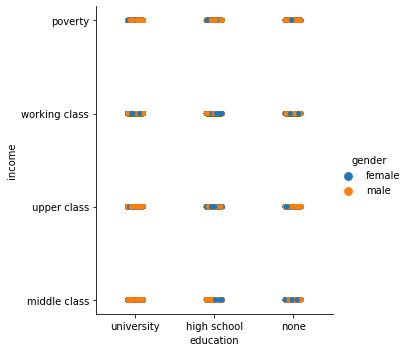

In [38]:
sns.catplot(data = X, x = 'education', y = 'income', hue = 'gender')

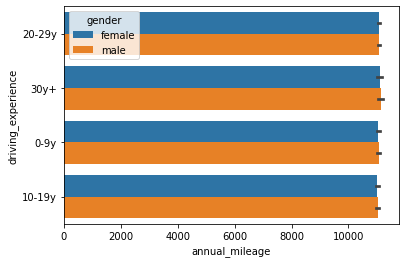

In [39]:
sns.barplot(data = X, y = 'driving_experience', x = 'annual_mileage', hue = 'gender', saturation = .8)

In [40]:
pd.pivot_table(data = X, index = ['vehicle_ownership', 'vehicle_year', 'income'])

annual_mileage  children  \
vehicle_ownership vehicle_year income                                    
0.0               after 2015   middle class     11115.826702  0.517241   
                               poverty          10912.888889  0.522667   
                               upper class      11022.037218  0.504652   
                               working class    11155.046826  0.509886   
                  before 2015  middle class     10926.510989  0.545330   
                               poverty          11018.315018  0.516484   
                               upper class      11028.994577  0.508552   
                               working class    11036.339755  0.517513   
1.0               after 2015   middle class     11035.754399  0.532946   
                               poverty          11122.730574  0.525781   
                               upper class      11080.646002  0.514301   
                               working class    11109.017643  0.528752   
                  before 2015  middle class     11002.349831  0.528271   
                               poverty          11077.687720  0.518428   
                               upper class      11036.296232  0.516510   
                               working class    11098.138442  0.526658   

                                              credit_score      duis  \
vehicle_ownership vehicle_year income                                  
0.0               after 2015   middle class       0.601110  0.126437   
                               poverty            0.609386  0.149333   
                               upper class        0.600985  0.114838   
                               working class      0.606341  0.118106   
                  before 2015  middle class       0.604773  0.121566   
                               poverty            0.599626  0.115751   
                               upper class        0.599713  0.139132   
                               working class      0.591726  0.121716   
1.0               after 2015   middle class       0.604841  0.137589   
                               poverty            0.600375  0.123094   
                               upper class        0.602959  0.134618   
                               working class      0.607867  0.142888   
                  before 2015  middle class       0.601589  0.134968   
                               poverty            0.599847  0.124790   
                               upper class        0.600371  0.122295   
                               working class      0.603484  0.131393   

                                               married  past_accidents  \
vehicle_ownership vehicle_year income                                    
0.0               after 2015   middle class   0.577365        0.557913   
                               poverty        0.599111        0.611556   
                               upper class    0.584476        0.527424   
                               working class  0.595734        0.518210   
                  before 2015  middle class   0.592033        0.549451   
                               poverty        0.604396        0.504029   
                               upper class    0.591364        0.557363   
                               working class  0.581436        0.553853   
1.0               after 2015   middle class   0.586672        0.535193   
                               poverty        0.585512        0.585512   
                               upper class    0.585517        0.551237   
                               working class  0.573840        0.547266   
                  before 2015  middle class   0.585402        0.556323   
                               poverty        0.584187        0.550390   
                               upper class    0.583585        0.551254   
                               working class  0.579704        0.534882   

                                              speeding_violations  
vehicle_ownersh

## Feature Selection

In [ ]:
X1.shape

(105000, 20)

In [ ]:
# 20 dimensional data

In [ ]:
pca = PCA(.8)

In [ ]:
fit_pca = pca.fit(X1)

In [ ]:
fit_pca.explained_variance_ratio_

array([0.07503854, 0.07452225, 0.0741998 , 0.07362236, 0.07321692,
       0.07305323, 0.07278996, 0.07247858, 0.07234279, 0.072123  ,
       0.07169455])

In [ ]:
# 11 dimensional data

In [ ]:
X2 = pca.transform(X1)

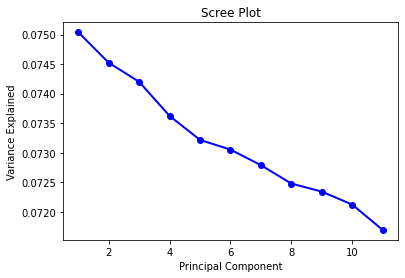

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

## Train Test Splitting

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X2,y,test_size = .1, stratify = y)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)

(94500, 11)
(10500, 11)


## Modeling

In [ ]:
def print_acc(model,Xtrain,Xtest,ytrain,ytest):
    print('------------------------------------------|')
    print(f'|  Training Accuracy | {log_loss(ytrain, model.predict(Xtrain))} |')
    print('------------------------------------------|')
    print(f'|  Test Accuracy     | {log_loss(ytest, model.predict(Xtest))} |')
    print('------------------------------------------|')

def gen_conf(actual,pred):
    classes = [0,1]
    cm = confusion_matrix(actual,pred, labels=classes)
    sn.heatmap(cm/np.sum(cm),fmt = '.2%', annot=True)
    plt.title("Confusion matrix")
    plt.show()

### Naive Bayes

In [ ]:
gnb = BernoulliNB()
gnb.fit(Xtrain, ytrain)
pred = gnb.predict(Xtest)
print(log_loss(ytest, gnb.predict_proba(Xtest)))

0.6811392280324836


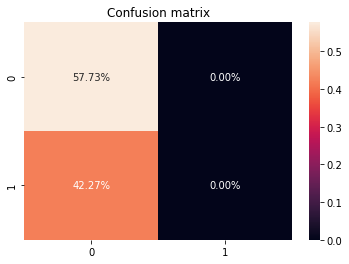

In [ ]:
gen_conf(ytest, pred)

### From the basic Naive Bayes model we can see that the false negatives are high. The True negatives are very low and the False Positives are very low. 
### We must decrease the False Negatives.
***

### Random Forest Classifier

In [ ]:
dtc = RandomForestClassifier(n_jobs = -1)
dtc.fit(Xtrain, ytrain)
dpred = dtc.predict(Xtest)
log_loss(ytest, dpred)

15.999802487753382

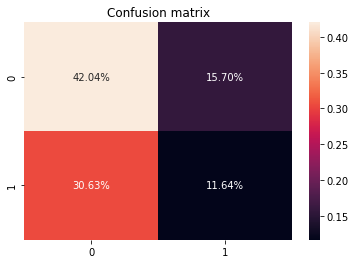

In [ ]:
gen_conf(ytest, dpred)

***

### XGBoost with RandomizedSearchCV

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.02, 0.05]    
        }

In [ ]:
skf = StratifiedKFold(n_splits = 10, shuffle = True)

In [ ]:
xgc = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 100, objective = 'binary:logistic', nthread = 6, tree_method = 'gpu_hist', eval_metric = 'logloss')

In [ ]:
random_cv = RandomizedSearchCV(xgc,param_distributions = params, n_jobs = -1, cv = skf.split(Xtrain,ytrain), n_iter = 50, scoring = 'neg_log_loss')

In [ ]:
random_cv.fit(Xtrain, ytrain)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fcdb416bed0>,
                   estimator=XGBClassifier(eval_metric='logloss',
                                           learning_rate=0.01, nthread=6,
                                           tree_method='gpu_hist'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 0.5, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='neg_log_loss')

In [ ]:
random_cv.best_params_

{'kernel': 'linear', 'gamma': 0.0001, 'C': 0.1}

In [ ]:
random_cv.best_score_

-0.6828250229308213

In [ ]:
#random_cv.fit(Xtrain, ytrain)
pred_proba = random_cv.predict_proba(Xtrain)
preds = random_cv.predict(Xtrain)
print(log_loss(ytrain, pred_proba))

0.6822770970826426


In [ ]:
test_preds = random_cv.predict_proba(Xtest)
print(log_loss(ytest, test_preds))

0.6827907506624857


In [ ]:
test_pred = random_cv.predict(Xtest)

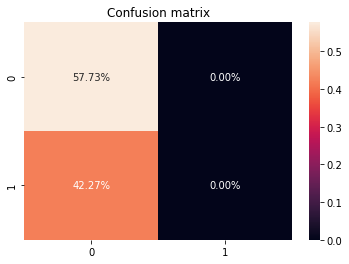

In [ ]:
gen_conf(ytest, test_pred)

In [ ]:
# this function adjusts the probability
def change_probas(pred_probas, p):
    x = []
    for i in pred_probas:
        if i[1] > p:
            x.append(i[1])
        else:
            x.append(i[0])
    return np.array(x)

def return_probas(pred_probas, p):
    x = []
    for i in pred_probas:
        if i[1] > p:
            x.append(1.0)
        else:
            x.append(0.0)
    return np.array(x)

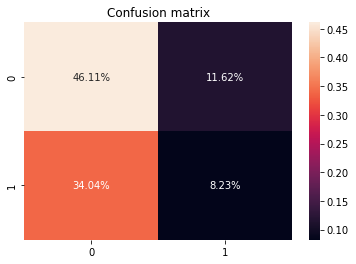

In [ ]:
gen_conf(ytest, return_probas(test_preds, .454))

***